In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd
import xlrd

In [2]:
data = pd.read_excel('allTweets.xlsx')

In [3]:
len(data)

36146

In [4]:
data.tail()

,ID,usernameTweet,text,url,nbr_retweet,nbr_favorite,nbr_reply,date,time,has_media,medias,is_reply,is_retweet,user_id,place,country
36141,1025756348565221376,Shanjid47002351,We need help. #AirportRoadCrash #AirportRoadAc...,/Shanjid47002351/status/1025756348565221376,0,0,0,2018-08-04 20:52:25,2018-08-04 20:52:25,NaN,NaN,False,False,990982099078340610,NaN,NaN
36142,1025820827877400577,TalukdarYousuf,# WeWantJustice #AirportRoadAccident #banglade...,/TalukdarYousuf/status/1025820827877400577,0,0,0,2018-08-05 01:08:38,2018-08-05 01:08:38,NaN,NaN,False,False,882589456179445760,NaN,NaN
36143,1025831423612137474,TalukdarYousuf,# WeWantJustice #bangladeshstudentprotests #Ai...,/TalukdarYousuf/status/1025831423612137474,0,0,0,2018-08-05 01:50:45,2018-08-05 01:50:45,NaN,NaN,False,False,882589456179445760,NaN,NaN
36144,1026076037489119233,AnshaRehnum,https://www. facebook.com/10000347680730 5/pos...,/AnshaRehnum/status/1026076037489119233,0,0,0,2018-08-05 18:02:45,2018-08-05 18:02:45,NaN,NaN,False,False,1025731703942172673,NaN,NaN
36145,1026519881439752192,bdnewsplus,এভাবে প্রতিটি শহরে নেতৃত্ব হোক বিশ্ববিদ্যালয় ...,/bdnewsplus/status/1026519881439752192,0,0,0,2018-08-06 23:26:26,2018-08-06 23:26:26,NaN,NaN,False,False,831209327402815489,NaN,NaN


In [5]:
txt_lst = list(data['text'])

In [6]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [15]:
for i in range(len(txt_lst)):
    try:
        for j in range(len(txt_lst[i])):
            if (ord(txt_lst[i][j]) >127):
                txt_lst[i] = txt_lst[i].replace(txt_lst[i][j],'')
    except:
        continue

In [16]:
txt_lst

["# BTSARMY is jumping into what's happening in Bangladesh . The hashtag #WeWantJustice is #BTS fans' way of creating more attention on the issue. Here's a report on the situation. https:// abcnews.go.com/International/ wireStory/scores-injured-traffic-protests-bangladesh-capital-57030231   https:// twitter.com/hopeworldmono/ status/1025870887881453568  ",
 'Young leaders in Bangladesh , we are with you. Its disgusting to see how young people are being treated and abused just because they are speaking out against injustices and poor governance. We support all those who fight for human rights and good governance #WeWantJustice',
 '# WeWantJustice #Bangladesh pic.twitter.com/4ke95eDxsg',
 "Omg, I hope Bangladesh students stay strong... Please read and let's help Bangladesh Armys and students with the hashtags below. We need to support this to #ENDVIOLENCE I strongly support the students movement against road accident. #StopRoadAccident #WeWantJustice #WeWantSafe pic.twitter.com/J0fAM4092

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [18]:
new_data = []

for i in range (len(txt_lst)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', txt_lst[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(txt_lst[i])

txt_lst = new_data

In [19]:
data['text'] = txt_lst

In [20]:
data['time'] = pd.to_datetime(data['time'])

data = data.sort_values('time')

In [21]:
data

,ID,usernameTweet,text,url,nbr_retweet,nbr_favorite,nbr_reply,date,time,has_media,medias,is_reply,is_retweet,user_id,place,country
12439,1023546983812747265,RudroSanim,# WeWantJustice #Bangladesh pic.twitter.com/iv...,/RudroSanim/status/1023546983812747265,0,2,0,2018-07-29 18:33:12,2018-07-29 18:33:12,NaN,NaN,False,False,1021418328621907968,NaN,NaN
20679,1023576497456525312,Rashique360,Total disasters are happening regularly due to...,/Rashique360/status/1023576497456525312,2,0,0,2018-07-29 20:30:28,2018-07-29 20:30:28,NaN,NaN,False,False,3758016132,NaN,NaN
33845,1023788242141765632,trshuvo1,Believe it or not .. our Transportation Minist...,/trshuvo1/status/1023788242141765632,0,0,0,2018-07-30 10:31:52,2018-07-30 10:31:52,NaN,NaN,False,False,950707518375804928,NaN,NaN
33846,1023796626194751488,ArpitaTabz,Bangladesh Road accident situation so horrible...,/ArpitaTabz/status/1023796626194751488,0,0,0,2018-07-30 11:05:11,2018-07-30 11:05:11,NaN,NaN,False,False,1023510284764233729,NaN,NaN
33847,1023815909415108609,anima_h,The worst thing that can happen to a nation is...,/anima_h/status/1023815909415108609,0,0,0,2018-07-30 12:21:49,2018-07-30 12:21:49,NaN,NaN,False,False,324463101,NaN,NaN
5265,1023877130369687552,rupok__,# we_want_justice #BDTwitterUser #Bangladesh,/rupok__/status/1023877130369687552,0,12,0,2018-07-30 16:25:05,2018-07-30 16:25:05,NaN,NaN,False,False,271546187,NaN,NaN
24843,1023880642935701504,rashedkhanmonir,#wewantjustice #Bangladesh,/rashedkhanmonir/status/1023880642935701504,0,0,0,2018-07-30 16:39:02,2018-07-30 16:39:02,NaN,NaN,False,False,1687604791,NaN,NaN
8759,1023895539966992385,asivechowdhury,The #HighCourt today directed the #JabaleNoorP...,/asivechowdhury/status/1023895539966992385,0,4,0,2018-07-30 17:38:14,2018-07-30 17:38:14,NaN,NaN,False,False,147143845,NaN,NaN
7621,1023915629730877440,haidersuman,"! , ! !! !!! #wewantjustice #...",/haidersuman/status/1023915629730877440,0,5,0,2018-07-30 18:58:04,2018-07-30 18:58:04,NaN,NaN,False,False,1405581504,NaN,NaN
1316,1023924000890617857,haidersuman,- ? #wewantjustice #Dh...,/haidersuman/status/1023924000890617857,12,43,1,2018-07-30 19:31:20,2018-07-30 19:31:20,NaN,NaN,False,False,1405581504,NaN,NaN


In [22]:
data.index = list(np.arange(len(data)))

In [23]:
txt_lst = [re.sub('\S*@\S*\s?', '', sent) for sent in txt_lst]

# Remove new line characters
txt_lst = [re.sub('\s+', ' ', sent) for sent in txt_lst]

# Remove distracting single quotes
txt_lst = [re.sub("\'", "", sent) for sent in txt_lst]

pprint(txt_lst[:1])

['# BTSARMY is jumping into whats happening in Bangladesh . The hashtag '
 '#WeWantJustice is #BTS fans way of creating more attention on the issue. '
 'Heres a report on the situation. ']


In [24]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(txt_lst))

print(data_words[:1])


[['btsarmy', 'is', 'jumping', 'into', 'whats', 'happening', 'in', 'bangladesh', 'the', 'hashtag', 'wewantjustice', 'is', 'bts', 'fans', 'way', 'of', 'creating', 'more', 'attention', 'on', 'the', 'issue', 'heres', 'report', 'on', 'the', 'situation']]


In [25]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['btsarmy', 'is', 'jumping', 'into', 'whats', 'happening', 'in', 'bangladesh', 'the', 'hashtag', 'wewantjustice', 'is', 'bts_fans', 'way', 'of', 'creating', 'more', 'attention', 'on', 'the', 'issue', 'heres', 'report', 'on', 'the', 'situation']


In [26]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [27]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['jump', 's', 'happen', 'bangladesh', 'hashtag', 'wewantjustice', 'bts_fan', 'way', 'create', 'attention', 'issue', 'here', 'report', 'situation']]


In [31]:
import csv

csvfile = "C:\\Users\\Alvi Rahman\\Desktop\\Farhana Miss\\student\\student\\lem.txt"

#Assuming res is a list of lists
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(data_lemmatized)

In [49]:
data_lemmatized = []
with open('C:\\Users\\16101106\\Desktop\\student\\data_lem.txt', "r") as output:
    data_lemmatized.append(output.read())

In [53]:
data_lemmatized = data_lemmatized[0].split('\n')

In [55]:
data_lemmatized = [data_lemmatized[i].split(',') for i in range(len(data_lemmatized))]

In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [29]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [44]:
lda_model.show_topics(formatted=False)

[(14,
  [('que', 0.04432969),
   ('isso', 0.007911969),
   ('esto', 0.007241576),
   ('esto_sendo', 0.002838652),
   ('vida', 0.0021722065),
   ('coisa', 0.00172247),
   ('podis', 3.25387e-05),
   ('como', 3.2538017e-05),
   ('estn', 3.2538e-05),
   ('contra', 3.2537904e-05)]),
 (13,
  [('youth', 0.10817929),
   ('silence', 0.06341566),
   ('suppose', 0.01021884),
   ('anymore', 0.008092457),
   ('unyouthenvoy', 2.8228013e-05),
   ('inspire', 2.8227769e-05),
   ('event', 2.8227532e-05),
   ('state', 2.8227472e-05),
   ('shahiduls', 2.8227412e-05),
   ('courage', 2.822738e-05)]),
 (9,
  [('live', 0.17179766),
   ('connection', 0.019423371),
   ('aware', 0.016582713),
   ('por', 0.014576777),
   ('physically', 0.005742095),
   ('ser', 0.0044295336),
   ('governo', 0.004066724),
   ('ele', 0.0035477157),
   ('gente', 0.0034146814),
   ('estudante', 0.0032619275)]),
 (10,
  [('peaceful', 0.1108958),
   ('time', 0.10094412),
   ('abduct', 0.074870706),
   ('come', 0.053723954),
   ('well', 

In [59]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.202*"photographer" + 0.151*"even" + 0.138*"alam" + 0.084*"activist" + '
  '0.034*"child" + 0.017*"crackdown" + 0.015*"wrong" + 0.015*"global" + '
  '0.014*"post" + 0.014*"control"'),
 (1,
  '0.267*"video" + 0.142*"be" + 0.058*"show" + 0.031*"write" + 0.031*"find" + '
  '0.026*"have" + 0.023*"everything" + 0.023*"channel" + 0.013*"already" + '
  '0.006*"major"'),
 (2,
  '0.181*"jail" + 0.123*"job" + 0.055*"case" + 0.048*"pm" + 0.045*"youth" + '
  '0.045*"young" + 0.044*"word" + 0.026*"contact" + 0.020*"minister" + '
  '0.019*"photo_journalist"'),
 (3,
  '0.167*"group" + 0.167*"day" + 0.152*"bangladeshi" + 0.134*"today" + '
  '0.066*"retweet" + 0.022*"tweet" + 0.010*"attempt" + 0.004*"later" + '
  '0.003*"politic" + 0.001*"procession"'),
 (4,
  '0.130*"report" + 0.091*"stand" + 0.079*"murder" + 0.057*"current" + '
  '0.056*"watch" + 0.053*"coverage" + 0.018*"internet_access" + 0.016*"learn" '
  '+ 0.016*"social_activist" + 0.011*"wifi"'),
 (5,
  '0.398*"shahidul_alam" + 0.176*"

In [60]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -13.462653730690452

Coherence Score:  0.3684103062993775


In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

E:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.380377  0.334553       1        1  40.374249
6     -0.284253 -0.293719       2        1  16.158768
16    -0.206318 -0.133739       3        1   7.917632
8     -0.105094 -0.014564       4        1   5.060081
17     0.027439  0.020126       5        1   3.875445
7     -0.051818 -0.015128       6        1   3.214023
18     0.018549  0.000891       7        1   3.199682
5     -0.050852 -0.014776       8        1   2.644106
11     0.037188  0.003936       9        1   2.607434
15     0.078572  0.026119      10        1   2.289164
0      0.023581  0.001795      11        1   1.928261
14     0.001068 -0.002312      12        1   1.924101
3      0.049429  0.005530      13        1   1.575749
1      0.092289  0.010210      14        1   1.567679
4      0.110015  0.011556      15        1   1.324632
2      0.080421  0.009134      16        1   1.310355
9      0.115945  0.011906      17        1   1.119283
12     0.146798  0.012826      18        1   1.113453
10     0.145971  0.012826      19        1   0.473459
19     0.151448  0.012831      20        1   0.322441, topic_info=     Category          Freq           Term         Total  loglift  logprob
1     Default  59028.000000     bangladesh  59028.000000  30.0000  30.0000
46    Default  21778.000000        student  21778.000000  29.0000  29.0000
13    Default  32948.000000  wewantjustice  32948.000000  28.0000  28.0000
30    Default  11647.000000            pic  11647.000000  27.0000  27.0000
28    Default  11518.000000            com  11518.000000  26.0000  26.0000
...       ...           ...            ...           ...      ...      ...
977   Topic20      0.048875       campaign      2.029840   2.0106 -10.3619
883   Topic20      0.048875    human_right      2.029866   2.0106 -10.3619
886   Topic20      0.048875           work      2.029951   2.0105 -10.3619
1164  Topic20      0.048875           free      2.030292   2.0103 -10.3619
1374  Topic20      0.048873   freeshahidul      2.030596   2.0101 -10.3620

[735 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
333       9  0.995307    abduct
32        1  0.449063  accident
32        5  0.549912  accident
451      16  0.977206       act
492       8  0.990973    action
...     ...       ...       ...
95        1  0.999415     world
113      14  0.993915     write
280      11  0.984252     wrong
27       16  0.992029     young
209      16  0.992256     youth

[361 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 17, 9, 18, 8, 19, 6, 12, 16, 1, 15, 4, 2, 5, 3, 10, 13, 11, 20])

In [62]:
import os

In [63]:
os.environ['MALLET_HOME'] = 'C:\\mallet'

mallet_path = 'C:\\mallet\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [64]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(11,
  [('student', 0.16735366859027206),
   ('attack', 0.1126036564667087),
   ('police', 0.08321613888754183),
   ('university', 0.023228747393433877),
   ('activist', 0.020901023228747394),
   ('bangladesh', 0.01983414965326609),
   ('league', 0.018185345036613162),
   ('goon', 0.017166965714562825),
   ('peaceful', 0.0164395519130983),
   ('sister', 0.014160322001842782)]),
 (3,
  [('bangladesh', 0.15542613488638135),
   ('wewantjustice', 0.13837033955592534),
   ('movement', 0.1006707919504966),
   ('govt', 0.09531485622172534),
   ('support', 0.09084290988508138),
   ('school', 0.059747283032603606),
   ('kid', 0.039207529509645886),
   ('demand', 0.03775154698143622),
   ('bnpjamaat', 0.029743643076283084),
   ('topple', 0.024907701107586708)]),
 (1,
  [('bangladesh', 0.3162595501990746),
   ('wewantjustice', 0.23684493704939202),
   ('bcl', 0.04713225008070591),
   ('savebangladesh', 0.025879694393629613),
   ('chhatra_league', 0.025664478639836435),
   ('petition', 0.02566447

In [65]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('justice', 0.09383521620568758),
   ('world', 0.07216595247370472),
   ('youth', 0.04207245812232178),
   ('voice', 0.03228476821192053),
   ('bangladesh', 0.028973509933774833),
   ('hope', 0.027707440592130893),
   ('fight', 0.027561355668095054),
   ('deserve', 0.026830931047915854),
   ('hear', 0.024104012465913517),
   ('live', 0.024006622516556293)]),
 (16,
  [('cnn', 0.17745230127341474),
   ('bbc', 0.16384892868008172),
   ('aljazeera', 0.1254291798861315),
   ('saferoadsforall', 0.03637706984223565),
   ('citizen', 0.031552870615845975),
   ('skynews_ccbm', 0.02364292233473858),
   ('telegraph_thesun', 0.022382545960276414),
   ('dailymail_theguardian', 0.020904863314355253),
   ('bbcnew', 0.0191229518883915),
   ('world', 0.018557955582598113)]),
 (11,
  [('student', 0.16735366859027206),
   ('attack', 0.1126036564667087),
   ('police', 0.08321613888754183),
   ('university', 0.023228747393433877),
   ('activist', 0.020901023228747394),
   ('bangladesh', 0.0198341496

In [66]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [67]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

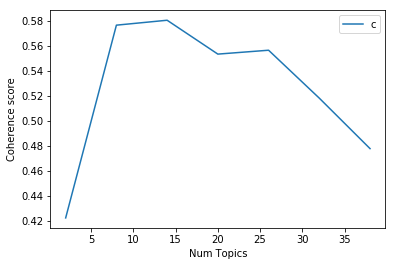

In [68]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [69]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4222
Num Topics = 8  has Coherence Value of 0.5763
Num Topics = 14  has Coherence Value of 0.5803
Num Topics = 20  has Coherence Value of 0.5532
Num Topics = 26  has Coherence Value of 0.5563
Num Topics = 32  has Coherence Value of 0.518
Num Topics = 38  has Coherence Value of 0.4776


In [72]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.043*"shahidul_alam" + 0.025*"bangladeshi" + 0.019*"photographer" + '
  '0.019*"day" + 0.019*"release" + 0.017*"freeshahidul" + 0.017*"give" + '
  '0.015*"shahidulalam" + 0.015*"arrest" + 0.012*"shahidul"'),
 (1,
  '0.285*"bangladesh" + 0.175*"wewantjustice" + 0.098*"roadsafety" + '
  '0.095*"dhaka" + 0.039*"roadsafetybd" + 0.023*"rt" + 0.017*"savebangladesh" '
  '+ 0.016*"child" + 0.011*"studentprotest" + 0.007*"action"'),
 (2,
  '0.139*"cnn" + 0.128*"bbc" + 0.098*"aljazeera" + 0.085*"bangladesh" + '
  '0.066*"wewantjustice" + 0.027*"world" + 0.025*"citizen" + '
  '0.019*"skynews_ccbm" + 0.018*"telegraph_thesun" + 0.017*"saferoadsforall"'),
 (3,
  '0.091*"happen" + 0.070*"spread" + 0.060*"people" + 0.039*"wewantjustice" + '
  '0.035*"trend" + 0.032*"stop" + 0.032*"bangladesh" + 0.028*"hashtag" + '
  '0.025*"pray" + 0.024*"awareness"'),
 (4,
  '0.084*"government" + 0.083*"medium" + 0.061*"news" + 0.038*"bangladesh" + '
  '0.032*"international" + 0.031*"situation" + 0.027*"cove

In [ ]:
#df_dominant_topic.to_excel('F:\Python\Alvi\dominant.xlsx')

In [ ]:
#sent_topics_sorteddf_mallet.to_excel('F:\Python\Alvi\sent_topics_sorteddf_mallet.xlsx')

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [37]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

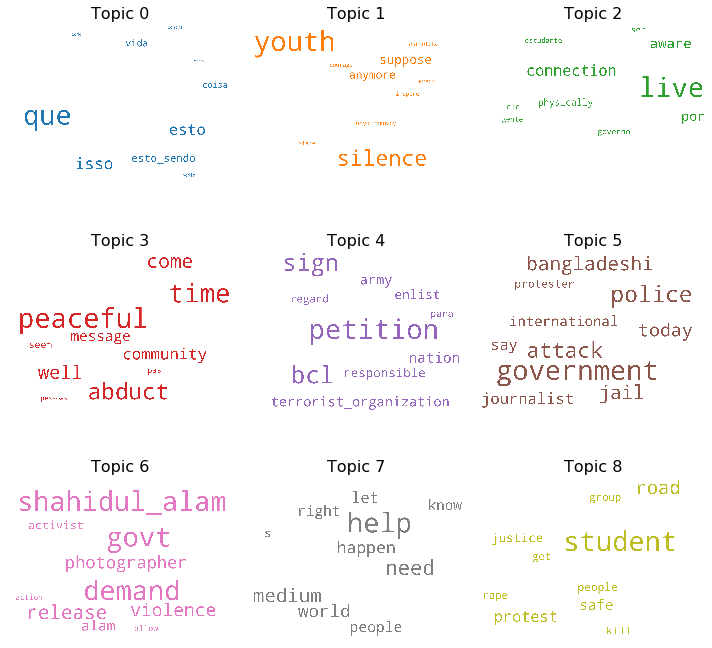

In [45]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = lda_model.show_topics(formatted=False)


fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()